In [1]:
# Import libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
import mglearn

# Exercise 1

In [2]:
# Import the data set "W06_training.txt“

df = pd.read_csv('W06_training.txt', delimiter=";")
df

,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities,Fraud
0,2,1401,58.83,17,2,7,1,0
1,2,655,57.20,6,7,1,4,0
2,4,770,36.00,28,11,3,4,0
3,5,272,89.76,1,4,0,2,0
4,6,1511,8.75,15,0,7,4,0
...,...,...,...,...,...,...,...,...
299995,6,900,31.50,15,1,9,2,0
299996,4,1395,23.02,11,1,6,0,0
299997,4,131,87.75,27,1,3,0,0
299998,2,1724,95.33,20,10,8,3,0


In [3]:
# Use only the first 7 columns (i.e. ignore the „Fraud“ column for now)

y = df['Fraud']
df = df.drop(columns='Fraud')
df

,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities
0,2,1401,58.83,17,2,7,1
1,2,655,57.20,6,7,1,4
2,4,770,36.00,28,11,3,4
3,5,272,89.76,1,4,0,2
4,6,1511,8.75,15,0,7,4
...,...,...,...,...,...,...,...
299995,6,900,31.50,15,1,9,2
299996,4,1395,23.02,11,1,6,0
299997,4,131,87.75,27,1,3,0
299998,2,1724,95.33,20,10,8,3


In [4]:
# Divide each column by its maximum value, so that each each column is scaled between 0 and 1

df_scaled = df.apply(lambda x: x / x.max())
df_scaled

,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities
0,0.333333,0.729308,0.560713,0.566667,0.181818,0.7,0.2
1,0.333333,0.340968,0.545177,0.200000,0.636364,0.1,0.8
2,0.666667,0.400833,0.343119,0.933333,1.000000,0.3,0.8
3,0.833333,0.141593,0.855509,0.033333,0.363636,0.0,0.4
4,1.000000,0.786569,0.083397,0.500000,0.000000,0.7,0.8
...,...,...,...,...,...,...,...
299995,1.000000,0.468506,0.300229,0.500000,0.090909,0.9,0.4
299996,0.666667,0.726184,0.219405,0.366667,0.090909,0.6,0.0
299997,0.666667,0.068194,0.836352,0.900000,0.090909,0.3,0.0
299998,0.333333,0.897449,0.908597,0.666667,0.909091,0.8,0.6


In [5]:
# preprocessing using 0-1 scaling

#scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [6]:
# Perform a principal component analysis. 
# Report the explained variance ratio and the components of the first two principal components

pca = PCA()
pca.fit(df_scaled)
evr = pca.explained_variance_ratio_ #Percentage of variance explained by each of the selected components.
evr

array([0.1848808 , 0.1586412 , 0.15534268, 0.13222208, 0.12823175,
       0.12057974, 0.12010175])

Principal component analysis or PCA is one of the oldest dimensionality reduction methods.
Principal component analysis is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data.

The first plot (top left) shows the original data points, colored to distinguish among them. The algorithm proceeds by first finding the direction of maximum variance, labeled “Component 1.” This is the direction (or vector) in the data that contains most of the information, or in other words, the direction along which the features are most correlated with each other. Then, the algorithm finds the direction that contains the most information while being orthogonal (at a right angle) to the first direction. In two dimensions, there is only one possible orientation that is at a right angle, but in higher-dimensional spaces there would be (infinitely) many orthogonal directions. Although the two components are drawn as arrows, it doesn’t really matter where the head and the tail are; we could have drawn the first component from the center up to the top left instead of down to the bottom right. The directions found using this process are called principal components, as they are the main directions of variance in the data. In general, there are as many principal components as original features.

One of the most common applications of PCA is visualizing high-dimensional datasets.

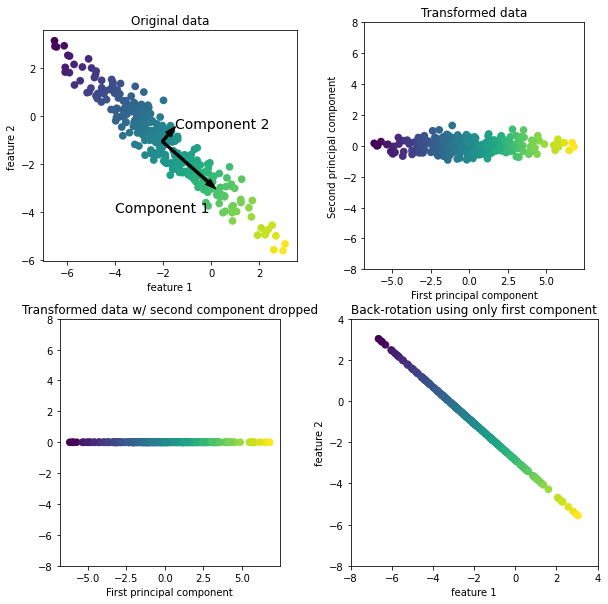

In [7]:
# Transformation of Data with PCA Figure 3-3

mglearn.plots.plot_pca_illustration()

The second plot (top right) shows the same data, but now rotated so that the first principal component aligns with the x-axis and the second principal component aligns with the y-axis. Before the rotation, the mean was subtracted from the data, so that the transformed data is centered around zero. In the rotated representation found by PCA, the two axes are uncorrelated, meaning that the correlation matrix of the data in this representation is zero except for the diagonal.

We can use PCA for dimensionality reduction by retaining only some of the principal components. In this example, we might keep only the first principal component, as shown in the third panel in Figure 3-3 (bottom left). This reduces the data from a two-dimensional dataset to a one-dimensional dataset. Note, however, that instead of keeping only one of the original features, we found the most interesting direction (top left to bottom right in the first panel) and kept this direction, the first principal component.

Finally, we can undo the rotation and add the mean back to the data. This will result in the data shown in the last panel in Figure 3-3. These points are in the original feature space, but we kept only the information contained in the first principal component. This transformation is sometimes used to remove noise effects from the data or visualize what part of the information is retained using the principal components.

In [8]:
# The components of the first two principal components

pd.DataFrame(evr[:2], columns=['Explained variance ratio'], index=['1st', '2nd'])

,Explained variance ratio
1st,0.184881
2nd,0.158641


In [9]:
#The principal components themselves are stored in the components_ attribute of the PCA object during fitting:

print('Components of the first two principal components')
pd.DataFrame(pca.components_[:2], columns=df.columns, index=['1st', '2nd'])

Components of the first two principal components


,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities
1st,-0.001364,0.000306,0.00272,-0.010662,0.002007,0.011759,0.999867
2nd,-0.013057,0.001897,-0.00708,0.018096,-0.168284,-0.985384,0.012120


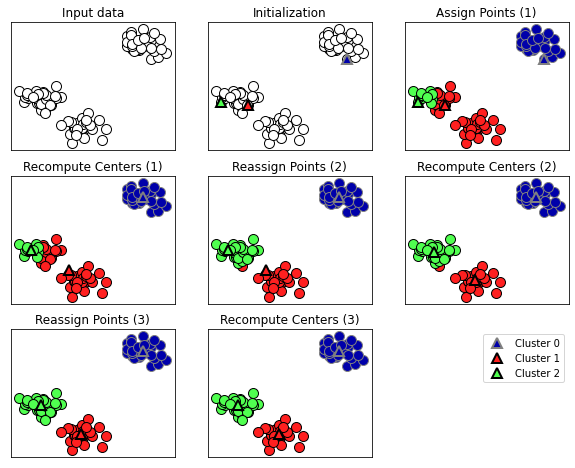

In [10]:
mglearn.plots.plot_kmeans_algorithm()

k-Means Clustering

k-means clustering is one of the simplest and most commonly used clustering algorithms. It tries to find cluster centers that are representative of certain regions of the data. The algorithm alternates between two steps: assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it. The algorithm is finished when the assignment of instances to clusters no longer changes.

Cluster centers are shown as triangles, while data points are shown as circles. Colors indicate cluster membership. In the example below, we specified that we are looking for three clusters, so the algorithm was initialized by declaring three data points randomly as cluster centers. Then the iterative algorithm starts. 

First, each data point is assigned to the cluster center it is closest to. Next, the cluster centers are updated to be the mean of the assigned points. Then the process is repeated two more times. After the third iteration, the assignment of points to cluster centers remained unchanged, so the algorithm stops.


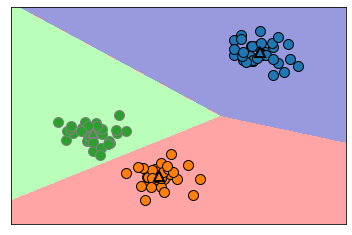

In [11]:
# Given new data points, k-means will assign each to the closest cluster center. 
# The next example (Figure 3-24) shows the boundaries of the cluster centers that were learned in Figure 3-23:

mglearn.plots.plot_kmeans_boundaries()

Here, we apply it to the synthetic data that we used for the preceding plots. 
We instantiate the KMeans class, and set the number of clusters we are looking for. Then we call the fit method with the data.

In [12]:
# Perform a k-means cluster analysis to derive a solution with 3 clusters. 
# For comparison use KMeans(n_clusters=3, random_state=100) to always get the same results.
# Report the components of the cluster centers and the size of the clusters 
# (i.e. the number of data points assigned to each cluster)

model = KMeans(n_clusters=3, random_state=100)
model.fit(df_scaled)
labels = model.predict(df_scaled)
print(labels)


[0 2 2 ... 0 1 2]


In [13]:
print('Cluster centers')
centroids = model.cluster_centers_
pd.DataFrame(centroids, columns=df.columns)

Cluster centers


,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities
0,0.583552,0.476425,0.475896,0.516744,0.501803,0.500564,0.154004
1,0.586190,0.474106,0.477564,0.510935,0.521116,0.791210,0.739286
2,0.582460,0.478819,0.476625,0.520049,0.474890,0.206942,0.735576


In [14]:
pd.Series(labels).value_counts().to_frame('Cluster Size')

,Cluster Size
0,122503
1,88951
2,88546


# Exercise 2 

Context:

Your client is a grocery retailer facing increasing pressure from expanding competition. To reduce personnel costs while at the same time improving service quality, it has been relying on self-service checkout stations for some time now. At these stations, customers can scan their products themselves and pay directly. 
The self-checkout stations help avoid long queues and speed up the payment process for individuals. However, it also offers the opportunity to cheat when scanning the products.

In order to identify fraudulent actions without upsetting innocent customers through controls, the company has commissioned you and your team as an external consultancy to develop a model that determines the probability of fraud in self-checkout purchases. 

Your assignment is now to use the collected data and develop a high-performance model for predicting or detecting fraud and to identify the key indicators for fraudulent behavior.
When creating the classification model the following costs and revenues should be considered:


The table shows that each correctly identified fraud attempt brings in an average of EUR 5 additional revenue. Each fraud attempt that is not detected, however, causes 5 EUR costs. Customers who are falsely accused of fraud may not return, which means an average loss of 25 EUR for the supermarket. Correctly identified honest customers mean neither profit nor loss.

Task:

The aim of the analysis is to use the data set of 300,000 cases (W06_training.txt) to train a model that is suitable for detecting fraud attempts. The prediction of your model is finally checked with the help of another data set with 100,000 purchases for which you do not know the target variable. This data set (W06_scoring.txt) is used to evaluate how well your model’s prediction works, using the total cost or total revenue. 

This means that you must ensure that there is no overfitting when training your model, otherwise the prediction on the new data set will give poor results. To do this, you should split your data set into training and test data or use a suitable cross-validation method to avoid overfitting.

In [15]:
# Get an overview and understanding of the available data

sum(y)

14328

Only 14328 out of 300000 are fraud - that is 4.776%.
We should get a similar percentage in the scoring data, assuming they have the same distibution

In [38]:
# Clean the data if necessary and derive new “smart” variables
# (e.g. scale the data or compute ratios of given variables) that can be used for the predictions
# the scaled DataFrame from exercise 1 is used for the train_test_split

# This stratify parameter makes a split so that the proportion of values in the sample produced will be the same 
# as the proportion of values provided to parameter stratify.
# E.g., if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% 
# of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

X_train_val, X_test, y_train_val, y_test = train_test_split(df_scaled, y, random_state=4, 
                                                            stratify=y, test_size=0.1)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, 
                                                  random_state=40, stratify=y_train_val)

To evaluate our supervised models, so far we have split our dataset into a training set and a test set using the train_test_split function, built a model on the training set by calling the fit method, and evaluated it on the test set using the score method, which for classification computes the fraction of correctly classified samples.

The reason we split our data into training and test sets is that we are interested in measuring how well our model generalizes to new, previously unseen data. We are not interested in how well our model fit the training set, but rather in how well it can make predictions for data that was not observed during training.

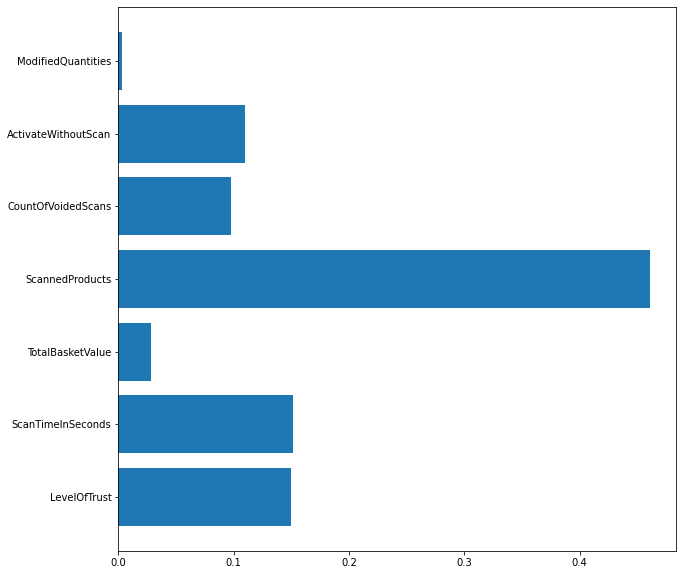

In [17]:
# Determine which characteristics are key characteristics as they are driving fraudulent behavior

# Decision trees are widely used models for classification and regression tasks. 
# Essentially, they learn a hierarchy of if/else questions, leading to a decision.

clf = DecisionTreeClassifier(random_state=40)
clf.fit(X_train, y_train)
plt.figure(figsize=(10,10))
plt.barh(width=clf.feature_importances_, y=X_train_val.columns.values)
plt.show()

As we can see, if we fit a Decision Tree Classifier, the features with more importance are: ScannedProducts, LevelOfTrust and ScanTimeInSeconds

In [18]:
# Use the appropriate classification algorithms e.g. LogisticRegression &/or Random Forest and make predictions. 
# If necessary, tune the parameters of the model

logreg = LogisticRegression(max_iter=100)
logreg.fit(X_train, y_train)
print("Accuracy on training set: {:.5f}".format(logreg.score(X_train, y_train)))
print("Accuracy on validation set: {:.5f}".format(logreg.score(X_val, y_val)))

y_pred_train = logreg.predict(X_train)
print("f1 score on training set: {:.5f}".format(f1_score(y_train, y_pred_train)))
y_pred_val = logreg.predict(X_val)
print("f1 score on validation set: {:.5f}".format(f1_score(y_val, y_pred_val)))

Accuracy on training set: 0.99108
Accuracy on validation set: 0.99092
f1 score on training set: 0.90503
f1 score on validation set: 0.90305


Definition of cross-validation and it worked: 

Cross-validation is a statistical method of evaluating generalization performance that is more stable and thorough than using a split into a training and a test set. In cross- validation, the data is instead split repeatedly and multiple models are trained. 

The most commonly used version of cross-validation is k-fold cross-validation, where k is a user-specified number, usually 5 or 10. When performing five-fold cross-validation, the data is first partitioned into five parts of (approximately) equal size, called folds. Next, a sequence of models is trained. 

The first model is trained using the first fold as the test set, and the remaining folds (2–5) are used as the training set. The model is built using the data in folds 2–5, and then the accuracy is evaluated on fold 1. Then another model is built, this time using fold 2 as the test set and the data in folds 1, 3, 4, and 5 as the training set. 

This process is repeated using folds 3, 4, and 5 as test sets. For each of these five splits of the data into training and test sets, we compute the accuracy. In the end, we have collected five accuracy values.

In the end, we have collected five accuracy values. The process is illustrated in Figure 5-1:

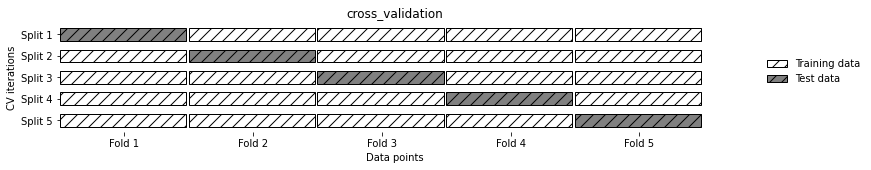

In [19]:
# Figure 5-1. Data splitting in five-fold cross-validation

mglearn.plots.plot_cross_validation()

Usually, the first fifth of the data is the first fold, the second fifth of the data is the second fold, and so on.

Benefits of Cross-Validation:

There are several benefits to using cross-validation instead of a single split into a training and a test set. First, remember that train_test_split performs a random split of the data. Imagine that we are “lucky” when randomly splitting the data, and all examples that are hard to classify end up in the training set. In that case, the test set will only contain “easy” examples, and our test set accuracy will be unrealistically high.

Conversely, if we are “unlucky,” we might have randomly put all the hard-to- classify examples in the test set and consequently obtain an unrealistically low score. However, when using cross-validation, each example will be in the training set exactly once: each example is in one of the folds, and each fold is the test set once. Therefore, the model needs to generalize well to all of the samples in the dataset for all of the cross-validation scores (and their mean) to be high.

Having multiple splits of the data also provides some information about how sensi‐ tive our model is to the selection of the training dataset. 

Another benefit of cross-validation as compared to using a single split of the data is that we use our data more effectively. When using train_test_split, we usually use 75% of the data for training and 25% of the data for evaluation. When using five-fold cross-validation, in each iteration we can use four-fifths of the data (80%) to fit the model. When using 10-fold cross-validation, we can use nine-tenths of the data (90%) to fit the model. More data will usually result in more accurate models.

The disadvantage of cross-validation:

The main disadvantage of cross-validation is increased computational cost. As we are now training k models instead of a single model, cross-validation will be roughly k times slower than doing a single split of the data.

Important note:

It is important to keep in mind that cross-validation is not a way to build a model that can be applied to new data. Cross-validation does not return a model. When calling cross_val_score, multiple models are built internally, but the purpose of cross-validation is only to evaluate how well a given algorithm will generalize when trained on a specific dataset.

In [20]:
# The parameters of the cross_val_score function are the model we want to evaluate, the training data, 
# and the ground-truth labels. Let’s evaluate LogisticRegression on the dataset and summarize 
# the cross-validation accuracy is to compute the mean:

cv_scores = cross_val_score(logreg, X_train_val, y_train_val, cv=5, scoring='f1')
print(cv_scores)
np.mean(cv_scores)

[0.90299685 0.90616941 0.90539206 0.89561091 0.90702236]


0.9034383182830974

What is a random forest?

A random forest is a machine learning technique that’s used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems.

A random forest algorithm consists of many decision trees. The ‘forest’ generated by the random forest algorithm is trained through bagging or bootstrap aggregating. Bagging is an ensemble meta-algorithm that improves the accuracy of machine learning algorithms.

The (random forest) algorithm establishes the outcome based on the predictions of the decision trees. It predicts by taking the average or mean of the output from various trees. Increasing the number of trees increases the precision of the outcome.

A random forest eradicates the limitations of a decision tree algorithm. It reduces the overfitting of datasets and increases precision. It generates predictions without requiring many configurations in packages

Features of a Random Forest Algorithm

It’s more accurate than the decision tree algorithm.
It provides an effective way of handling missing data.
It can produce a reasonable prediction without hyper-parameter tuning.
It solves the issue of overfitting in decision trees.
In every random forest tree, a subset of features is selected randomly at the node’s splitting point.

In [21]:
forest = RandomForestClassifier(n_estimators=50, max_depth=5, max_features=5, random_state=30, n_jobs=-1)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_val, y_val)))

y_pred_train = forest.predict(X_train)
print("f1 score on training set: {:.5f}".format(f1_score(y_train, y_pred_train)))
y_pred_val = forest.predict(X_val)
print("f1 score on validation set: {:.5f}".format(f1_score(y_val, y_pred_val)))

Accuracy on training set: 0.987
Accuracy on test set: 0.987
f1 score on training set: 0.86298
f1 score on validation set: 0.86416


In [22]:
cv_scores = cross_val_score(forest, X_train_val, y_train_val, cv=5, scoring='f1')
print(cv_scores)
np.mean(cv_scores)

/Users/Olympio/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/Olympio/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[0.84091841 0.84892086 0.85485855 0.84623281 0.84598349]


0.8473828237050111

We can see that the Logistic Regression performs better, so we will do a gridsearch to find the best value for C, the inverse of regularization strength

Grid Search

Now that we know how to evaluate how well a model generalizes, we can take the next step and improve the model’s generalization performance by tuning its parameters.

Finding the values of the important parameters of a model (the ones that provide the best generalization performance) is a tricky task, but necessary for almost all models and datasets. Because it is such a common task, there are standard methods in scikit-learn to help you with it. The most commonly used method is grid search, which basically means trying all possible combinations of the parameters of interest.

Consider the case of a kernel SVM with an RBF (radial basis function) kernel, as implemented in the SVC class.

There are two important parameters: the kernel bandwidth, gamma, and the regularization parameter, C. Say we want to try the values 0.001, 0.01, 0.1, 1, 10, and 100 for the parameter C, and the same for gamma. Because we have six different settings for C and gamma that we want to try, we have 36 combinations of parameters in total.

In [23]:
c_space = np.logspace(-5, 5, 11)
c_space

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])

In [24]:
param_grid = {'C': c_space}
logreg2 = LogisticRegression()
logreg_cv = GridSearchCV(logreg2, param_grid, cv=5, scoring='f1')
logreg_cv.fit(X_train_val, y_train_val)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 100.0}
Best score is 0.9063409895170171


In [25]:
# Measure the quality of the model or compare the quality of the models and choose a final model

Confusion matrices

One of the most comprehensive ways to represent the result of evaluating binary classification is using confusion matrices.

Let's compare the confusion matrix for the Logistic Regression with the default value of C, and the one we found doing the gridsearch

In [26]:
print('Confusion Matrix for the Logistic Regression with the default value of C (C=1)')
print(confusion_matrix(y_val, logreg.predict(X_val)))

Confusion Matrix for the Logistic Regression with the default value of C (C=1)
[[64032   244]
 [  369  2855]]


The output of confusion_matrix is a two-by-two array, where the rows correspond to the true classes and the columns correspond to the predicted classes. Each entry counts how often a sample that belongs to the class corresponding to the row was classified as the class corresponding to the column. 

In [27]:
best_logreg = logreg_cv.best_estimator_
print('Confusion Matrix for the Logistic Regression with the value of C from the gridsearch (C=100)')
print(confusion_matrix(y_val, best_logreg.predict(X_val)))

Confusion Matrix for the Logistic Regression with the value of C from the gridsearch (C=100)
[[64003   273]
 [  328  2896]]


The .best_estimator_ attribute is an instance of the specified model type, which has the 'best' combination of given parameters from the param_grid. Whether or not this instance is useful depends on whether the refit parameter is set to True (it is by default)

So, although with C=100 we get a higher F1 score, in this particular case we are interested in minimizing the false positives, since they are penalized with a loss of 25 EUR for the supermarket. And we can see that with C=100 we get a higher number of false positives than with C=1. Therefore we're going to define our own metric, based on the gains and losses for each case and use gridsearch again to find the C that maximizes that metric

In [28]:
# Use statistical key figures, but especially the total costs or the total revenue

In [29]:
def revenue(y_true, y_pred):
    M = confusion_matrix(y_true, y_pred)
    return (M[0,1]*(-25) + M[1,0]*(-5) + M[1,1]*(5)) / (M[0,0] + M[0,1] + M[1,0] + M[1,1])

revenue_scorer = make_scorer(revenue)

In [30]:
print("If we didn't make any prediction mistakes, the score with this new metric would be:", revenue(y_train_val, y_train_val))

If we didn't make any prediction mistakes, the score with this new metric would be: 0.23879629629629628


In [31]:
c_space = np.logspace(-5, 5, 11)
param_grid = {'C': c_space}

logreg3 = LogisticRegression()
logreg_cv_custom = GridSearchCV(logreg3, param_grid, cv=5, scoring=revenue_scorer)
logreg_cv_custom.fit(X_train_val, y_train_val)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv_custom.best_params_)) 
print("Best score is {}".format(logreg_cv_custom.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.1}
Best score is 0.10564814814814816


In [32]:
best_logreg_custom = logreg_cv_custom.best_estimator_

Results on the test set:

In [33]:
M = [[f1_score(y_test, best_logreg.predict(X_test)), f1_score(y_test, best_logreg_custom.predict(X_test))],
     [revenue(y_test, best_logreg.predict(X_test)), revenue(y_test, best_logreg_custom.predict(X_test))]]

pd.DataFrame(M, columns=['C=100', 'C=0.1'], index=['F1', 'Revenue'])

,C=100,C=0.1
F1,0.911994,0.883234
Revenue,0.106167,0.105333


In [34]:
# Hand-in your fraud predictions (0/1) for each of the 100,000 cases of the scoring dataset

scoring = pd.read_csv('W06_scoring.txt', delimiter=";")
scoring

,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities
0,2,202,76.39,16,10,0,5
1,3,165,3.55,9,3,8,3
2,3,1601,57.11,6,1,6,4
3,3,571,22.73,14,4,7,4
4,6,288,53.36,3,5,1,3
...,...,...,...,...,...,...,...
99995,1,1142,2.36,11,3,7,1
99996,5,1276,34.76,7,6,2,4
99997,4,540,52.79,12,10,0,5
99998,3,1195,39.40,24,0,0,2


In [35]:
scoring_scaled = scoring.apply(lambda x: x / x.max())
scoring_scaled

,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities
0,0.333333,0.105208,0.728495,0.533333,0.909091,0.0,1.0
1,0.500000,0.085938,0.033855,0.300000,0.272727,0.8,0.6
2,0.500000,0.833854,0.544631,0.200000,0.090909,0.6,0.8
3,0.500000,0.297396,0.216765,0.466667,0.363636,0.7,0.8
4,1.000000,0.150000,0.508869,0.100000,0.454545,0.1,0.6
...,...,...,...,...,...,...,...
99995,0.166667,0.594792,0.022506,0.366667,0.272727,0.7,0.2
99996,0.833333,0.664583,0.331490,0.233333,0.545455,0.2,0.8
99997,0.666667,0.281250,0.503433,0.400000,0.909091,0.0,1.0
99998,0.500000,0.622396,0.375739,0.800000,0.000000,0.0,0.4


In [36]:
fraud_prediction = best_logreg_custom.predict(scoring_scaled)
sum(fraud_prediction)

4194

**Observation**: The number of incorrect labeled samples is probably a bit higher using C=0.1 than C=100, but we decided to optimize the revenue and not the F1 score.

In [37]:
fraud_prediction

array([0, 0, 0, ..., 0, 0, 0])

Resource: Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido